# Imports

In [1]:
import os
import logging
import pandas as pd
import datetime
import numpy as np
import subprocess

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

import ipywidgets as widgets
from ipywidgets import interact

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.palettes import Spectral10

from IPython.display import Image

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

In [2]:
import importlib

In [3]:
#importlib.reload(dxAndMxHelperFcts)

# Logging

In [4]:
logger = logging.getLogger()  

logFileName= r"Example3.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [5]:
dbFilename="Example3"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [6]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True
                                ,maxRecords=-1
)

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example3.db3 exists readable ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\Example3.db3 is newer than
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MX1:
+SIR 3S' dbFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: running C:\\3S\Sir3s\SirCalc-90-14-02-10_Potsdam\SirCalc.exe ...
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MXS reading ...
INFO    ; dxWithMx.__init__: Example3: processing dx and mx ...


In [7]:
m.V3_AGSN.shape,m.dfAGSN.shape

((537, 52), (528, 10))

# Longitudinal Sections: V3_AGSN

In [8]:
m.V3_AGSN

Pos                   pk                   tk LFDNR  \
0    -1  5755933101669454049  5755933101669454049   1.0   
0     0  5755933101669454049  5755933101669454049   1.0   
1     1  5755933101669454049  5755933101669454049   1.0   
2     2  5755933101669454049  5755933101669454049   1.0   
3     3  5755933101669454049  5755933101669454049   1.0   
..   ..                  ...                  ...   ...   
523  39  4868980900521118307  4868980900521118307   3.0   
524  40  4868980900521118307  4868980900521118307   3.0   
525  41  4868980900521118307  4868980900521118307   3.0   
526  42  4868980900521118307  4868980900521118307   3.0   
527  43  4868980900521118307  4868980900521118307   3.0   

                      NAME XL compNr  nextNODE OBJTYPE                OBJID  \
0             Längsschnitt  0      1      V-E0    ROHR  5691533564979419761   
0             Längsschnitt  0      1  V-K1683S    ROHR  5691533564979419761   
1             Längsschnitt  0      1  V-K1693S    ROHR  5048873293262650113   
2             Längsschnitt  0      1  V-K2163S    ROHR  5715081934973525403   
3             Längsschnitt  0      1  V-K2043S    ROHR  5413647981880727734   
..                     ... ..    ...       ...     ...                  ...   
523  Längsschnitt in bar,B  2      1  R-K2583S    ROHR  4621030304810285220   
524  Längsschnitt in bar,B  2      1  R-K2593S    ROHR  5046251450517706156   
525  Längsschnitt in bar,B  2      1  R-K2603S    ROHR  5478012163155701568   
526  Längsschnitt in bar,B  2      1  R-K2613S    ROHR  4968402990875758821   
527  Längsschnitt in bar,B  2      1  R-K2623S    ROHR  4814824415166736381   

     ...  \
0    ...   
0    ...   
1    ...   
2    ...   
3    ...   
..   ...   
523  ...   
524  ...   
525  ...   
526  ...   
527  ...   

     ('TMAX', 'KNOT~*~*~*~RHO', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n  \
0                                           965.700012                                                  
0                                           965.701172                                                  
1                                           965.702148                                                  
2                                           965.702637                                                  
3                                           965.703735                                                  
..                                                 ...                                                  
523                                         983.764526                                                  
524                                         983.754883                                                  
525                                         983.745789                                                  
526                                         983.747681                                                  
527                                         983.700012                                                  

         PH_n        T_n       H_n       RHO_n       mlc_n  \
0    4.878388       90.0  5.024506  965.700012  592.984993   
0    4.800117  89.998016  5.024687  965.701172  592.958713   
1    4.731768  89.996399  5.024986  965.702148  592.937202   
2    4.698539  89.995605  5.025103  965.702637  592.926449   
3    4.629901  89.993744  5.025112  965.703735  592.901884   
..        ...        ...       ...         ...         ...   
523  1.196312  59.871002  3.465572  983.764526  575.536089   
524   1.09261  59.890289  3.471704  983.754883  575.581644   
525  1.018315  59.908417  3.477824  983.745789  575.631904   
526  0.911956  59.904633  3.489146  983.747681  575.729795   
527  0.778286       60.0  3.501595  983.700012  575.835077   

    ('STAT', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n  \
0                                           592.958713                                      
0        

In [9]:
m.dfAGSN

Pos  TYPE                   ID                   pk                   tk  \
0      0  ROHR  5691533564979419761  5755933101669454049  5755933101669454049   
1      1  ROHR  5048873293262650113  5755933101669454049  5755933101669454049   
2      2  ROHR  5715081934973525403  5755933101669454049  5755933101669454049   
3      3  ROHR  5413647981880727734  5755933101669454049  5755933101669454049   
4      4  ROHR  5134010500800575790  5755933101669454049  5755933101669454049   
..   ...   ...                  ...                  ...                  ...   
523   39  ROHR  4621030304810285220  4868980900521118307  4868980900521118307   
524   40  ROHR  5046251450517706156  4868980900521118307  4868980900521118307   
525   41  ROHR  5478012163155701568  4868980900521118307  4868980900521118307   
526   42  ROHR  4968402990875758821  4868980900521118307  4868980900521118307   
527   43  ROHR  4814824415166736381  4868980900521118307  4868980900521118307   

     LFDNR                   NAME  XL compNr  nextNODE  
0      1.0           Längsschnitt   0      1  V-K1683S  
1      1.0           Längsschnitt   0      1  V-K1693S  
2      1.0           Längsschnitt   0      1  V-K2163S  
3      1.0           Längsschnitt   0      1  V-K2043S  
4      1.0           Längsschnitt   0      1  V-K2033S  
..     ...                    ...  ..    ...       ...  
523    3.0  Längsschnitt in bar,B   2      1  R-K2583S  
524    3.0  Längsschnitt in bar,B   2      1  R-K2593S  
525    3.0  Längsschnitt in bar,B   2      1  R-K2603S  
526    3.0  Längsschnitt in bar,B   2      1  R-K2613S  
527    3.0  Längsschnitt in bar,B   2      1  R-K2623S  

[528 rows x 10 columns]

In [10]:
m.dfAGSN.columns.to_list()

['Pos', 'TYPE', 'ID', 'pk', 'tk', 'LFDNR', 'NAME', 'XL', 'compNr', 'nextNODE']

In [11]:
m.V3_AGSN.columns.to_list()

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 ('STAT',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TMIN',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TMAX',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 'QM',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('STA

# Section No. 1

In [12]:
dfAGSN=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==1)
]
colsAGSNBase=['LFDNR','XL','Pos']+['OBJTYPE'
                                   #,'OBJID'
                                   ,'DN'
                                   #,'Am2','Vm3'
                                   #,'NAME_CONT'
                                   ,'NAME_i','NAME_k']+['QM','direction']+['LSum']

dfAGSN[colsAGSNBase+['L','nextNODE','PH_n']]

LFDNR XL Pos OBJTYPE   DN    NAME_i    NAME_k          QM  direction  \
88    1.0  1  -1    ROHR  350      V-E0  V-K1683S  287.090057          1   
88    1.0  1   0    ROHR  350      V-E0  V-K1683S  287.090057          1   
89    1.0  1   1    ROHR  350  V-K1683S  V-K1693S  287.090057          1   
90    1.0  1   2    ROHR  350  V-K2163S  V-K1693S -287.090057         -1   
91    1.0  1   3    ROHR  350  V-K2043S  V-K2163S -287.090057         -1   
92    1.0  1   4    ROHR  350  V-K2033S  V-K2043S -287.090057         -1   
93    1.0  1   5    ROHR  350   V-K833S  V-K2033S -287.090057         -1   
94    1.0  1   6    ROHR  350   V-K833S   V-K843S  287.090057          1   
95    1.0  1   7    ROHR  350   V-K843S   V-K853S  287.090057          1   
96    1.0  1   8    ROHR  350   V-K853S   V-K863S  287.090057          1   
97    1.0  1   9    ROHR  350   V-K863S   V-K873S  287.090057          1   
98    1.0  1  10    ROHR  350   V-K873S   V-K883S  287.090057          1   
99    1.0  1  11    ROHR  350  V-K2193S   V-K883S -287.090057         -1   
100   1.0  1  12    ROHR  350  V-K2183S  V-K2193S -287.090057         -1   
101   1.0  1  13    ROHR  350   V-K933S  V-K2183S -287.090057         -1   
102   1.0  1  14    ROHR  300  V-K2173S   V-K933S  -196.61821         -1   
103   1.0  1  15    ROHR  300  V-K2063S  V-K2173S  -195.31485         -1   
104   1.0  1  16    ROHR  300   V-K583S  V-K2063S -190.243561         -1   
105   1.0  1  17    ROHR  250   V-K573S   V-K583S -186.158279         -1   
106   1.0  1  18    ROHR  200  V-K1083S   V-K573S  -86.279091         -1   
107   1.0  1  19    ROHR  200  V-K1073S  V-K1083S  -74.287712         -1   
108   1.0  1  20    ROHR  200  V-K1063S  V-K1073S  -68.383316         -1   
109   1.0  1  21    ROHR  150  V-K1053S  V-K1063S  -65.226578         -1   
110   1.0  1  22    ROHR  150  V-K1043S  V-K1053S  -65.226578         -1   
111   1.0  1  23    ROHR  150   V-K283S  V-K1043S  -65.226578         -1   
112   1.0  1  24    ROHR  150   V-K283S   V-K293S   67.962234          1   
113   1.0  1  25    ROHR  150   V-K293S   V-K303S    66.60968          1   
114   1.0  1  26    ROHR  150   V-K303S   V-K313S    66.60968          1   
115   1.0  1  27    ROHR  150   V-K313S   V-K323S   65.026474          1   
116   1.0  1  28    ROHR  150   V-K323S   V-K333S   63.425179          1   
117   1.0  1  29    ROHR  150   V-K333S    V-K03S   56.790668          1   
118   1.0  1  30    ROHR  150    V-K03S    V-K13S   52.848595          1   
119   1.0  1  31    ROHR  125    V-K13S    V-K23S    29.70521          1   
120   1.0  1  32    ROHR  125    V-K23S    V-K33S   30.252146          1   
121   1.0  1  33    ROHR  125    V-K33S    V-K43S   30.252146          1   
122   1.0  1  34    ROHR  125    V-K43S    V-K53S   30.252146          1   
123   1.0  1  35    ROHR  125    V-K53S    V-K63S   30.252146          1   
124   1.0  1  36    ROHR  125    V-K63S    V-K73S   27.649521          1   
125   1.0  1  37    ROHR  100    V-K73S    V-K83S   24.293217          1   
126   1.0  1  38    ROHR  100    V-K83S    V-K93S   15.303667          1   
127   1.0  1  39    ROHR  100    V-K93S   V-K103S   15.303667          1   
128   1.0  1  40    ROHR  100   V-K103S   V-K113S   15.303667          1   
129   1.0  1  41    ROHR  100   V-K113S   V-K123S   14.329748          1   
130   1.0  1  42    ROHR   80   V-K123S   V-K133S    9.812775          1   
131   1.0  1  43    ROHR   50   V-K133S   V-K143S    1.603431          1   

            LSum          L  nextNODE      PH_n  
88      0.000000   0.000000      V-E0  4.878388  
88     15.351701  15.351701  V-K1683S  4.800117  
89     27.860648  12.508947  V-K1693S  4.731768  
90     34.126153   6.265505  V-K2163S  4.698539  
91     48.533695  14.407541  V-K2043S  4.629901  
92     62.049538  13.515843  V-K2033S  4.579439  
93     79.324254  17.274715   V-K833S  4.538838  
94    113.666420  34.342167   V-K843S  4.452928  
95    149.752335  36.085915   V-K853S  4.400915  
96    2

In [13]:
dfAGSNRL=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==2)
]
dfAGSNRL[colsAGSNBase+['L','nextNODE','PH_n']]

LFDNR XL Pos OBJTYPE   DN    NAME_i    NAME_k          QM  direction  \
132   1.0  2  -1    ROHR  350      R-E0  R-K4163S -287.090057         -1   
132   1.0  2   0    ROHR  350      R-E0  R-K4163S -287.090057         -1   
133   1.0  2   1    ROHR  350  R-K4163S  R-K4173S -287.090057         -1   
134   1.0  2   2    ROHR  350  R-K4643S  R-K4173S  287.090057          1   
135   1.0  2   3    ROHR  350  R-K4523S  R-K4643S  287.090057          1   
136   1.0  2   4    ROHR  350  R-K4513S  R-K4523S  287.090057          1   
137   1.0  2   5    ROHR  350  R-K3313S  R-K4513S  287.090057          1   
138   1.0  2   6    ROHR  350  R-K3313S  R-K3323S -287.090057         -1   
139   1.0  2   7    ROHR  350  R-K3323S  R-K3333S -287.090057         -1   
140   1.0  2   8    ROHR  350  R-K3333S  R-K3343S -287.090057         -1   
141   1.0  2   9    ROHR  350  R-K3343S  R-K3353S -287.090057         -1   
142   1.0  2  10    ROHR  350  R-K3353S  R-K3363S -287.090057         -1   
143   1.0  2  11    ROHR  350  R-K4673S  R-K3363S  287.090057          1   
144   1.0  2  12    ROHR  350  R-K4663S  R-K4673S  287.090057          1   
145   1.0  2  13    ROHR  350  R-K3413S  R-K4663S  287.090057          1   
146   1.0  2  14    ROHR  300  R-K4653S  R-K3413S   196.61821          1   
147   1.0  2  15    ROHR  300  R-K4543S  R-K4653S   195.31485          1   
148   1.0  2  16    ROHR  250  R-K3063S  R-K4543S  190.852631          1   
149   1.0  2  17    ROHR  250  R-K3053S  R-K3063S  186.158279          1   
150   1.0  2  18    ROHR  200  R-K3563S  R-K3053S   85.443382          1   
151   1.0  2  19    ROHR  200  R-K3553S  R-K3563S   73.452003          1   
152   1.0  2  20    ROHR  150  R-K3543S  R-K3553S   67.547607          1   
153   1.0  2  21    ROHR  150  R-K3533S  R-K3543S   64.390877          1   
154   1.0  2  22    ROHR  150  R-K3523S  R-K3533S   64.390877          1   
155   1.0  2  23    ROHR  150  R-K2763S  R-K3523S   64.390877          1   
156   1.0  2  24    ROHR  150  R-K2763S  R-K2773S  -67.962234         -1   
157   1.0  2  25    ROHR  150  R-K2773S  R-K2783S   -66.60968         -1   
158   1.0  2  26    ROHR  150  R-K2783S  R-K2793S   -66.60968         -1   
159   1.0  2  27    ROHR  150  R-K2793S  R-K2803S  -65.026466         -1   
160   1.0  2  28    ROHR  150  R-K2803S  R-K2813S  -63.425175         -1   
161   1.0  2  29    ROHR  150  R-K2813S  R-K2483S  -56.790668         -1   
162   1.0  2  30    ROHR  150  R-K2483S  R-K2493S  -52.848595         -1   
163   1.0  2  31    ROHR  125  R-K2493S  R-K2503S   -29.63044         -1   
164   1.0  2  32    ROHR  125  R-K2503S  R-K2513S  -30.252146         -1   
165   1.0  2  33    ROHR  125  R-K2513S  R-K2523S  -30.252146         -1   
166   1.0  2  34    ROHR  125  R-K2523S  R-K2533S  -30.252146         -1   
167   1.0  2  35    ROHR  125  R-K2533S  R-K2543S  -30.252146         -1   
168   1.0  2  36    ROHR  125  R-K2543S  R-K2553S  -27.649519         -1   
169   1.0  2  37    ROHR  100  R-K2553S  R-K2563S  -24.293217         -1   
170   1.0  2  38    ROHR  100  R-K2563S  R-K2573S  -15.303667         -1   
171   1.0  2  39    ROHR  100  R-K2573S  R-K2583S  -15.303667         -1   
172   1.0  2  40    ROHR  100  R-K2583S  R-K2593S  -15.303667         -1   
173   1.0  2  41    ROHR  100  R-K2593S  R-K2603S  -14.329748         -1   
174   1.0  2  42    ROHR   80  R-K2603S  R-K2613S   -9.812775         -1   
175   1.0  2  43    ROHR   50  R-K2613S  R-K2623S   -2.769349         -1   

            LSum          L  nextNODE      PH_n  
132     0.000000   0.000000      R-E0  3.025742  
132    15.351701  15.351701  R-K4163S  2.953751  
133    27.860648  12.508947  R-K4173S  2.885188  
134    34.126153   6.265505  R-K4643S  2.851391  
135    48.533695  14.407541  R-K4523S   2.77346  
136    62.049538  13.515843  R-K4513S  2.729196  
137    79.324254  17.274715  R-K3313S  2.707725  
138   113.666420  34.342167  R-K3323S  2.629017  
139   149.752335  36.085915  R-K3333S  2.580512  
140   2

# Plot

## Define Axes

In [14]:
def fyPH(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('PH Druck in bar')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fymlc(ax,offset=60):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('mlc Druckhöhe in mlc')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fybarBzg(ax,offset=120):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('H Druck in barBzg')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyM(ax,offset=180):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('QM Massenstrom in t/h')
    #ax.set_ylim(500,550)
    #ax.set_yticks(sorted(np.append(np.linspace(500,550,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyT(ax,offset=240):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('T Tempertatur in °C')
    ax.set_ylim(55,95)
    #ax.set_yticks(sorted(np.append(np.linspace(0,95,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
 

## Plotfunction

In [15]:
def plot(dfAGSN=pd.DataFrame()
        ,dfAGSNRL=pd.DataFrame()
        ,PHCol='PH_n'
        ,mlcCol='mlc_n'
        ,zKoorCol='ZKOR_n'
        ,barBzgCol='H_n'
        ,QMCol='QM'
        ,TCol='T_n'
        ,xCol='LSum'
        
):
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 10, 21))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    #PH
    ax1 = ax0.twinx()     
    fyPH(ax1) 
    PH_SL=ax1.plot(dfAGSN[xCol], dfAGSN[PHCol], color='red', label='PH SL',ls='dotted')
    PH_RL=ax1.plot(dfAGSNRL[xCol], dfAGSNRL[PHCol], color='blue', label='PH RL',ls='dotted')
    
    #mlc
    ax11 = ax0.twinx()     
    fymlc(ax11) 
    mlc_SL=ax11.plot(dfAGSN[xCol], dfAGSN[mlcCol], color='red', label='mlc SL')
    mlc_RL=ax11.plot(dfAGSNRL[xCol], dfAGSNRL[mlcCol], color='blue', label='mlc RL')
    
    z=ax11.plot(dfAGSN[xCol], dfAGSN[zKoorCol], color='black', label='z',ls='dashed',alpha=.5)
    
    #barBZG
    ax12 = ax0.twinx()     
    fybarBzg(ax12) 
    barB_SL=ax12.plot(dfAGSN[xCol], dfAGSN[barBzgCol], color='red', label='H SL',ls='dashdot')
    barB_RL=ax12.plot(dfAGSNRL[xCol], dfAGSNRL[barBzgCol], color='blue', label='H RL',ls='dashdot')
    
    #M
    ax2 = ax0.twinx()     
    fyM(ax2)
    QM_SL=ax2.step(dfAGSN[xCol], dfAGSN[QMCol]*dfAGSN['direction'], color='orange', label='M SL')
    QM_RL=ax2.step(dfAGSNRL[xCol], dfAGSNRL[QMCol]*dfAGSNRL['direction'], color='cyan', label='M RL',ls='--')
    
    #T
    ax3 = ax0.twinx() 
    fyT(ax3)
    T_SL=ax3.plot(dfAGSN[xCol], dfAGSN[TCol], color='pink', label='T SL')
    T_RL=ax3.plot(dfAGSNRL[xCol], dfAGSNRL[TCol], color='lavender', label='T RL')
    
    ax0.set_title('Longitudinal Section for '+dbFilename)

    # added these three lines
    lns =  PH_SL+ PH_RL + mlc_SL+ mlc_RL + barB_SL+ barB_RL+ QM_SL+ QM_RL + T_SL+ T_RL + z
    labs = [l.get_label() for l in lns]
    ax0.legend(lns, labs)#, loc=0)
    
    plt.show()

## Plot

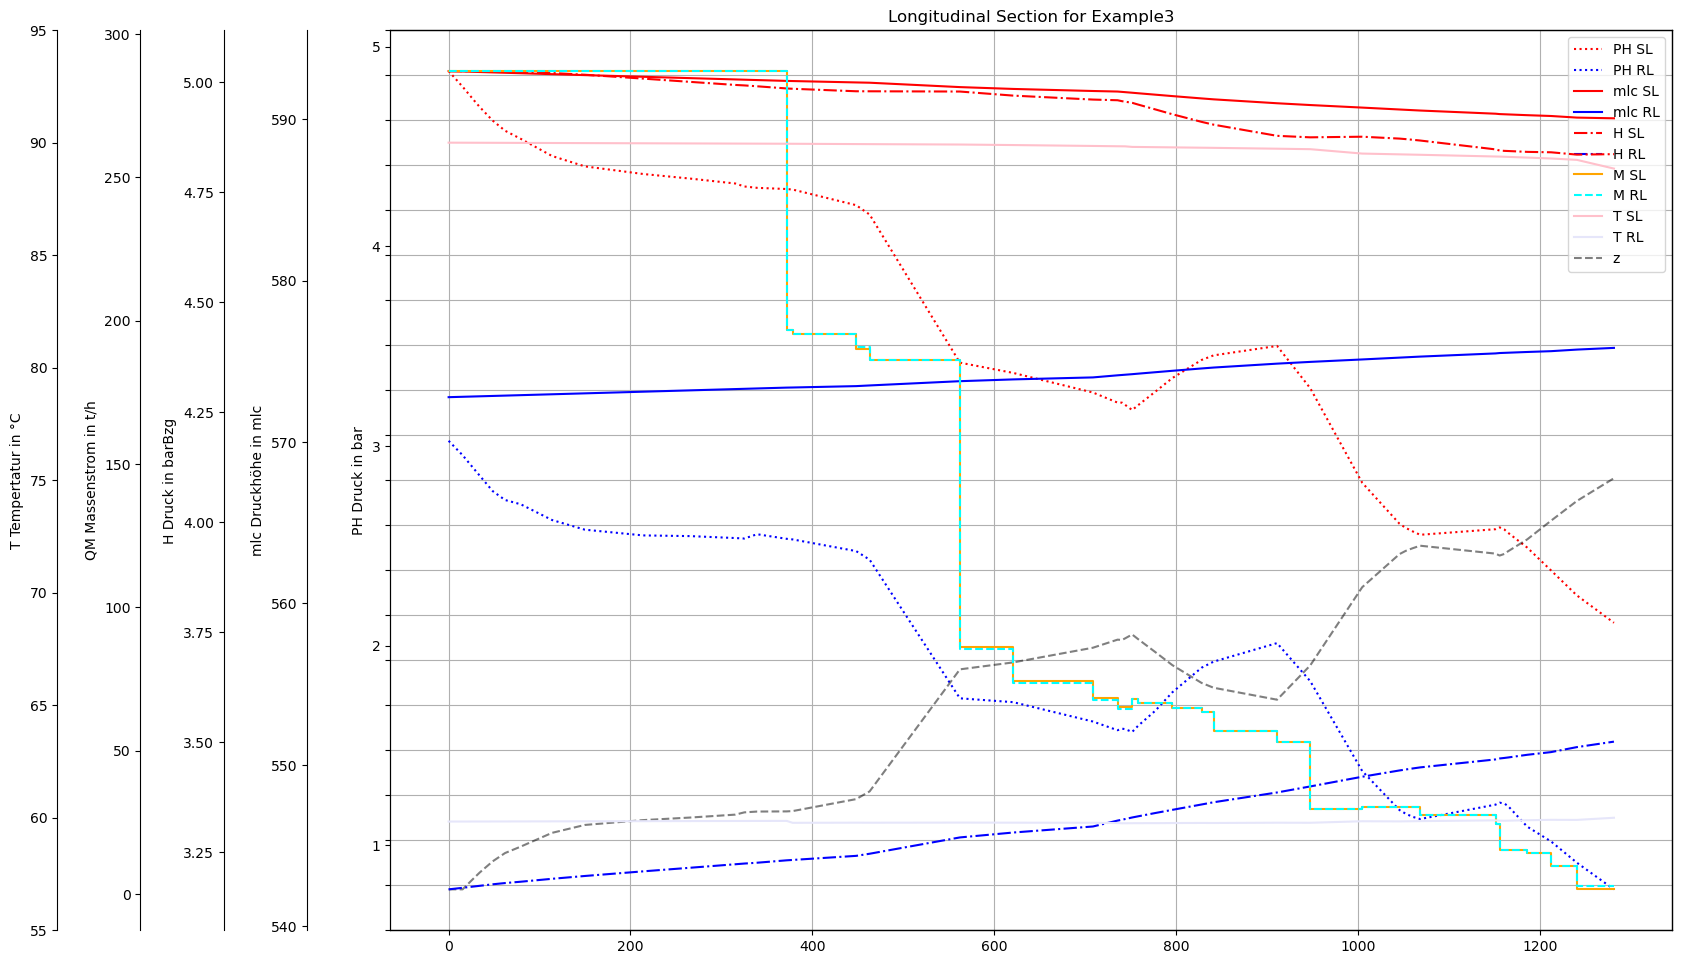

In [16]:
plot(dfAGSN,dfAGSNRL)

# V3_AGSN: Columns

In [17]:
m.V3_AGSN.columns.to_list()

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 ('STAT',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TMIN',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TMAX',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 'QM',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('STA

# V3_ROHRVEC (pipe interior points): Columns

In [18]:
m.V3_ROHRVEC.columns.to_list()

['pk',
 'fkDE',
 'rk',
 'tk',
 'fkKI',
 'fkKK',
 'fkDTRO_ROWD',
 'fkLTGR',
 'fkSTRASSE',
 'L',
 'LZU',
 'RAU',
 'JLAMBS',
 'LAMBDA0',
 'ZEIN',
 'ZAUS',
 'ZUML',
 'ASOLL',
 'INDSCHALL',
 'BAUJAHR',
 'HAL',
 'fkCONT',
 'fk2LROHR',
 'BESCHREIBUNG',
 'GEOMWKB',
 'DELETED',
 'SELECT1',
 'IDREFERENZ',
 'KENNUNG',
 'IPLANUNG',
 'KVR',
 'pk_BZ',
 'fkDE_BZ',
 'fk',
 'QSVB',
 'IRTRENN',
 'LECKSTATUS',
 'LECKSTART',
 'LECKEND',
 'LECKORT',
 'LECKMENGE',
 'IMPTNZ',
 'ZVLIMPTNZ',
 'KANTENZV',
 'GEOM',
 'GRAF',
 'MId',
 'MText',
 'Basis',
 'Variante',
 'BZ',
 'Geaendert',
 'Erstellt',
 'pk_VMBZ',
 'fkBASIS',
 'fkVARIANTE',
 'fkBZ',
 'MZ',
 'MT',
 'pk_CONT',
 'fkDE_CONT',
 'rk_CONT',
 'tk_CONT',
 'ID_CONT',
 'NAME_CONT',
 'IDPARENT_CONT',
 'rkPARENT_CONT',
 'LFDNR_CONT',
 'GRAF_CONT',
 'FONT_CONT',
 'GEOM_CONT',
 'DELETED_CONT',
 'SELECT1_CONT',
 'IDREFERENZ_CONT',
 'NAME_DTRO',
 'DN',
 'DI',
 'DA',
 'S',
 'KT',
 'PN',
 'Am2',
 'Vm3',
 'NAME_LTGR',
 'NAME_STRASSE',
 'tk_i',
 'NAME_i',
 'tk_k',
 'NAME

In [19]:
m.V3_AGSN.shape,m.V3_ROHRVEC.shape

((537, 52), (1070, 294))

# V3_AGSNVEC: Longitudinal Sections with pipe interior points

In [20]:
dfAGSNVec=m.V3_AGSNVEC

In [21]:
dfAGSNVec.head()

Pos                   pk                   tk LFDNR          NAME XL compNr  \
2   0  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
3   0  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
5   1  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
7   2  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
9   3  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   

   nextNODE OBJTYPE                OBJID  ...  \
2      V-E0    ROHR  5691533564979419761  ...   
3  V-K1683S    ROHR  5691533564979419761  ...   
5  V-K1693S    ROHR  5048873293262650113  ...   
7  V-K2163S    ROHR  5715081934973525403  ...   
9  V-K2043S    ROHR  5413647981880727734  ...   

   (TMAX, mlcPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                         602.571157           
3                                          602.48761           
5                                         602.419526           
7                                         602.385379           
9                                         602.306946           

  (TMAX, barBzgPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.927689             
3                                           5.919782             
5                                           5.913338             
7                                           5.910106             
9                                           5.902682             

  (TMAX, manPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                            4.87839                  
3                                           4.800115                  
5                                            4.73177                  
7                                            4.69854                  
9                                             4.6299                  

  (TMAX, mlcPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                         592.985013                  
3                                         592.958688                  
5                                         592.937222                  
7                                         592.926454                  
9                                         592.901869                  

  (TMAX, barBzgPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.019544                     
3                                           5.017056                     
5                                           5.015028                     
7                                            5.01401                     
9                                           5.011687                     

  (TMAX, manPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.786535                  
3                                            5.70284                  
5                                            5.63008                  
7                                           5.594635                  
9                                           5.520895                  

  (TMAX, mlcPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                         602.571157                  
3                                          602.48761                  
5                                         602.419526                  
7                                         602.385379                  
9                                         602.306946                  

   (TMAX, barBzgPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.927689                      
3                                           5.919782                      
5                                           5.913338        

In [22]:
#dfAGSNVec.columns.to_list()

# V3_AGSNVEC's columns from Multiindex-perspective

In [23]:
dfAGSNVec=dfAGSNVec.copy(deep=True)

In [24]:
dfAGSNVec.columns=pd.MultiIndex.from_tuples(
                [dxAndMxHelperFcts.fGetMultiindexTupleFromV3Col(col) for col in dfAGSNVec.columns.to_list()]
                ,names=['1','2','3','4'])   

In [25]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=1).to_list())) if not pd.isnull(col)])

['KNOT~*~*~*~H_i',
 'KNOT~*~*~*~H_k',
 'KNOT~*~*~*~H_n',
 'KNOT~*~*~*~PH_i',
 'KNOT~*~*~*~PH_k',
 'KNOT~*~*~*~PH_n',
 'KNOT~*~*~*~RHO_i',
 'KNOT~*~*~*~RHO_k',
 'KNOT~*~*~*~RHO_n',
 'KNOT~*~*~*~T_i',
 'KNOT~*~*~*~T_k',
 'KNOT~*~*~*~T_n',
 'QM',
 'QMVEC',
 'ROHR~*~*~*~A',
 'ROHR~*~*~*~DTTR',
 'ROHR~*~*~*~DWVERL',
 'ROHR~*~*~*~DWVERLABS',
 'ROHR~*~*~*~IAKTIV',
 'ROHR~*~*~*~IRTRENN',
 'ROHR~*~*~*~JV',
 'ROHR~*~*~*~MVEC',
 'ROHR~*~*~*~PDAMPF',
 'ROHR~*~*~*~PHR',
 'ROHR~*~*~*~PMIN',
 'ROHR~*~*~*~PVEC',
 'ROHR~*~*~*~PVECMAX_INST',
 'ROHR~*~*~*~PVECMIN_INST',
 'ROHR~*~*~*~QMAV',
 'ROHR~*~*~*~QMI',
 'ROHR~*~*~*~QMK',
 'ROHR~*~*~*~RHOI',
 'ROHR~*~*~*~RHOK',
 'ROHR~*~*~*~RHOVEC',
 'ROHR~*~*~*~TI',
 'ROHR~*~*~*~TK',
 'ROHR~*~*~*~TTRVEC',
 'ROHR~*~*~*~TVEC',
 'ROHR~*~*~*~VAV',
 'ROHR~*~*~*~VI',
 'ROHR~*~*~*~VK',
 'ROHR~*~*~*~VOLDA',
 'ROHR~*~*~*~WVL',
 'barBzgPVEC',
 'barBzgPVECMAX_INST',
 'barBzgPVECMIN_INST',
 'manPVEC',
 'manPVECMAX_INST',
 'manPVECMIN_INST',
 'mlcPVEC',
 'mlcPVECMAX_INST',
 'ml

In [26]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=0).to_list())) if not pd.isnull(col)])

['ASOLL',
 'Am2',
 'Am2_ROHRVEC',
 'BAUJAHR',
 'BESCHREIBUNG',
 'BESCHREIBUNG_n',
 'BZ',
 'Basis',
 'DA',
 'DELETED',
 'DELETED_CONT',
 'DI',
 'DN',
 'DN_ROHRVEC',
 'Erstellt',
 'FONT_CONT',
 'GEOM',
 'GEOMWKB',
 'GEOM_CONT',
 'GRAF',
 'GRAF_CONT',
 'Geaendert',
 'HAL',
 'H_n',
 'IDPARENT_CONT',
 'IDREFERENZ',
 'IDREFERENZ_CONT',
 'ID_CONT',
 'IMPTNZ',
 'INDSCHALL',
 'IPLANUNG',
 'IRTRENN',
 'IptIdx',
 'IptIdxAsNo',
 'JLAMBS',
 'JVAbs',
 'KANTENZV',
 'KENNUNG',
 'KT',
 'KVR',
 'KVR_n',
 'L',
 'LAMBDA0',
 'LECKEND',
 'LECKMENGE',
 'LECKORT',
 'LECKSTART',
 'LECKSTATUS',
 'LFDNR',
 'LFDNR_CONT',
 'LSum',
 'LZU',
 'L_ROHRVEC',
 'MId',
 'MT',
 'MText',
 'MZ',
 'NAME',
 'NAME_CONT',
 'NAME_CONT_ROHRVEC',
 'NAME_DTRO',
 'NAME_LTGR',
 'NAME_STRASSE',
 'NAME_i',
 'NAME_i_ROHRVEC',
 'NAME_k',
 'NAME_k_ROHRVEC',
 'OBJID',
 'OBJTYPE',
 'PHRAbs',
 'PH_n',
 'PN',
 'Pos',
 'QM',
 'QMAVAbs',
 'QSVB',
 'RAU',
 'RHO_n',
 'S',
 'SELECT1',
 'SELECT1_CONT',
 'STAT',
 'SVEC',
 'TIME',
 'TMAX',
 'TMIN',
 'T

In [27]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=2).to_list())) if not pd.isnull(col)])

[Timestamp('2023-02-12 23:00:00')]

In [28]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=3).to_list())) if not pd.isnull(col)])

[Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00')]

# Examination of V3_AGSNVEC

In [29]:
m.V3_AGSNVEC.head()

Pos                   pk                   tk LFDNR          NAME XL compNr  \
2   0  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
3   0  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
5   1  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
7   2  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   
9   3  5755933101669454049  5755933101669454049   1.0  Längsschnitt  0      1   

   nextNODE OBJTYPE                OBJID  ...  \
2      V-E0    ROHR  5691533564979419761  ...   
3  V-K1683S    ROHR  5691533564979419761  ...   
5  V-K1693S    ROHR  5048873293262650113  ...   
7  V-K2163S    ROHR  5715081934973525403  ...   
9  V-K2043S    ROHR  5413647981880727734  ...   

   (TMAX, mlcPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                         602.571157           
3                                          602.48761           
5                                         602.419526           
7                                         602.385379           
9                                         602.306946           

  (TMAX, barBzgPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.927689             
3                                           5.919782             
5                                           5.913338             
7                                           5.910106             
9                                           5.902682             

  (TMAX, manPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                            4.87839                  
3                                           4.800115                  
5                                            4.73177                  
7                                            4.69854                  
9                                             4.6299                  

  (TMAX, mlcPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                         592.985013                  
3                                         592.958688                  
5                                         592.937222                  
7                                         592.926454                  
9                                         592.901869                  

  (TMAX, barBzgPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.019544                     
3                                           5.017056                     
5                                           5.015028                     
7                                            5.01401                     
9                                           5.011687                     

  (TMAX, manPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.786535                  
3                                            5.70284                  
5                                            5.63008                  
7                                           5.594635                  
9                                           5.520895                  

  (TMAX, mlcPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                         602.571157                  
3                                          602.48761                  
5                                         602.419526                  
7                                         602.385379                  
9                                         602.306946                  

   (TMAX, barBzgPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)  \
2                                           5.927689                      
3                                           5.919782                      
5                                           5.913338        

In [30]:
m.V3_AGSNVEC['IptIdx'].unique()

array(['S', 'E'], dtype=object)

In [31]:
m.V3_AGSNVEC[~m.V3_AGSNVEC['IptIdx'].isin(['S','E'])]

Empty DataFrame
Columns: [Pos, pk, tk, LFDNR, NAME, XL, compNr, nextNODE, OBJTYPE, OBJID, L, DN, Am2, Vm3, NAME_CONT, NAME_i, NAME_k, ZKOR_n, BESCHREIBUNG_n, KVR_n, LSum, direction, (STAT, QM, 2023-02-12 23:00:00, 2023-02-12 23:00:00), (TIME, QM, 2023-02-12 23:00:00, 2023-02-12 23:00:00), (TMIN, QM, 2023-02-12 23:00:00, 2023-02-13 23:00:00), (TMAX, QM, 2023-02-12 23:00:00, 2023-02-13 23:00:00), QM, ('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('TMAX', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('STAT', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TIME', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TMIN', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('TMAX', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('STAT', 'KNOT~*~*~*~T', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TIME', 'KNOT~*~*~*~T', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TMIN', 'KNOT~*~*~*~T', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('TMAX', 'KNOT~*~*~*~T', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('STAT', 'KNOT~*~*~*~RHO', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TIME', 'KNOT~*~*~*~RHO', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TMIN', 'KNOT~*~*~*~RHO', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('TMAX', 'KNOT~*~*~*~RHO', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, PH_n, T_n, H_n, RHO_n, mlc_n, ('STAT', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TIME', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n, ('TMIN', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, ('TMAX', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n, pk_ROHRVEC, fkDE, rk, tk_ROHRVEC, fkKI, fkKK, fkDTRO_ROWD, fkLTGR, fkSTRASSE, L_ROHRVEC, LZU, RAU, JLAMBS, LAMBDA0, ZEIN, ZAUS, ZUML, ASOLL, INDSCHALL, BAUJAHR, HAL, fkCONT, fk2LROHR, BESCHREIBUNG, GEOMWKB, DELETED, SELECT1, IDREFERENZ, KENNUNG, IPLANUNG, KVR, pk_BZ, fkDE_BZ, fk, QSVB, IRTRENN, LECKSTATUS, LECKSTART, LECKEND, LECKORT, LECKMENGE, IMPTNZ, ZVLIMPTNZ, KANTENZV, GEOM, GRAF, MId, MText, ...]
Index: []

[0 rows x 344 columns]

## Section No. 1

In [32]:
dfAGSNVec=m.V3_AGSNVEC[
    (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==1)
]


In [33]:
dfAGSNVecRL=m.V3_AGSNVEC[
 (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==2)
]

## some Columns

In [34]:
t0rVec=pd.Timestamp(m.mx.df.index[0].strftime('%Y-%m-%d %X'))#.%f'))
manPVEC=('STAT',
                      'manPVEC',
                      t0rVec,
                      t0rVec)                    

In [35]:
manPVEC

('STAT',
 'manPVEC',
 Timestamp('2023-02-12 23:00:00'),
 Timestamp('2023-02-12 23:00:00'))

In [36]:
# for convenient colnames in celloutput
dfAGSNVec['manPVEC']=dfAGSNVec[manPVEC]
dfAGSNVecRL['manPVEC']=dfAGSNVecRL[manPVEC]

In [37]:
mlcPVEC=('STAT',
                      'mlcPVEC',
                      t0rVec,
                      t0rVec)   

In [38]:
# for convenient colnames in celloutput
dfAGSNVec['mlcPVEC']=dfAGSNVec[mlcPVEC]
dfAGSNVecRL['mlcPVEC']=dfAGSNVecRL[mlcPVEC]

In [39]:
QMVEC=('STAT',
                      'QMVEC',
                      t0rVec,
                      t0rVec)   

In [40]:
# for convenient colnames in celloutput
dfAGSNVec['QMVEC']=dfAGSNVec[QMVEC]
dfAGSNVecRL['QMVEC']=dfAGSNVecRL[QMVEC]

In [41]:
TVEC=('STAT',
'ROHR~*~*~*~TVEC',
t0rVec,
t0rVec)     

In [42]:
# for convenient colnames in celloutput
dfAGSNVec['TVEC']=dfAGSNVec[TVEC]
dfAGSNVecRL['TVEC']=dfAGSNVecRL[TVEC]

## Plot

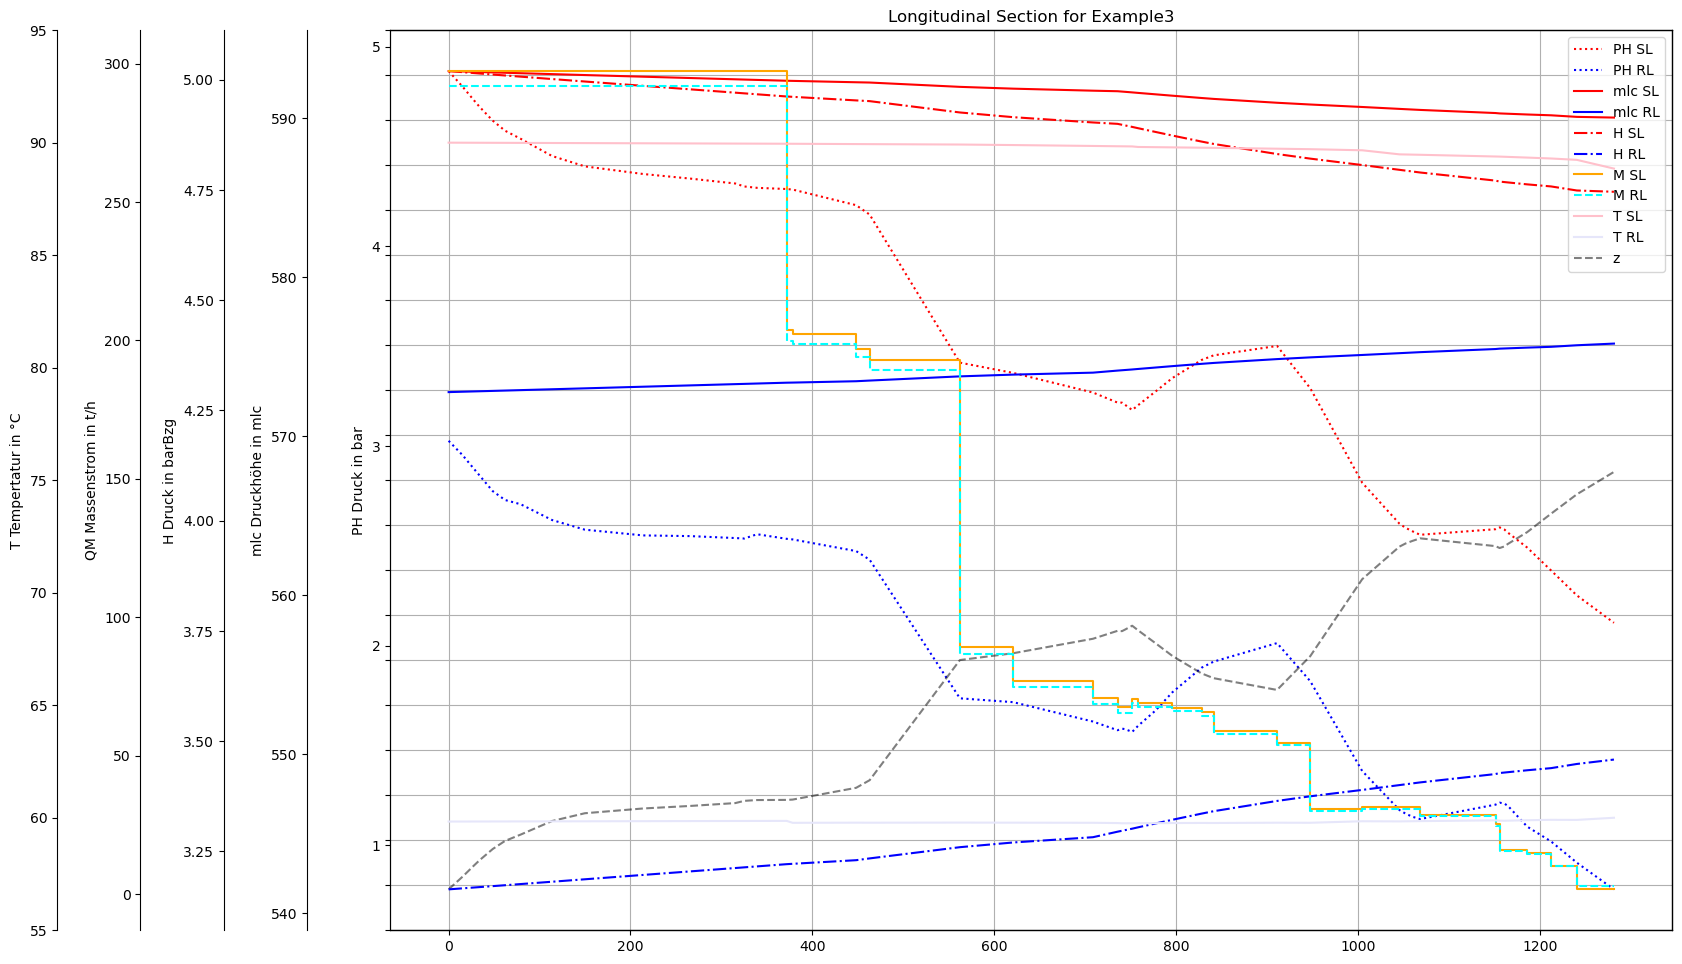

In [43]:
plot(dfAGSNVec,dfAGSNVecRL
        ,PHCol=manPVEC
        ,mlcCol=mlcPVEC
        ,zKoorCol='ZVEC'
        ,barBzgCol='H_n'
        ,QMCol=QMVEC
        ,TCol=TVEC
        ,xCol='LSum'
    
    )